In [22]:
from qiskit.quantum_info import Statevector, Operator
from qiskit import QuantumCircuit, Aer, execute
import numpy as np
import math
import matplotlib.pyplot as pl
import random

In [29]:
n = 8      #no. of qubits
N = 2**n   #dimension of matrix
t = 3      #no. of target states
length = list(range(n))
noi = math.floor(math.sqrt(N/t) * np.pi / 4)   #No of iterations
print("noi = ", noi)

#to set target states
target = np.zeros(t)
count = 0
flag = 0
i = 0
while(True):
    #to generate a random integer for target position
    a = random.randint(0,N-1)
    
    #checking if that number has already been chosen previously as target state
    for j in range(count):
        if(target[j] == a):
            flag = 1  #value is present in the target array
            
    #to store new value in target array
    if(flag == 0):
        #to store in count position of target array
        target[count] = a
        #updating count (position) value
        count += 1
        #checking for further iteration of i loop
        if(count == t):
            break
print("target = ",target)

phi = [a*np.pi/180 for a in range(181,361,15)]
print("phi = ",phi)

phi_m = [a*180/np.pi for a in phi]
print("phi_m = ",phi_m)
print("len(phi) = ",len(phi))

x = [complex(np.cos(a), np.sin(a)) for a in phi]
print("x = ",x)

#array to store coherence values after each suboperation in every grover's iteration
data = np.zeros((len(phi),noi * 4))   #to store coherence values
x_axis = list(range(noi * 4))        #to store iteration number
#print(data)

noi =  7
target =  [ 55. 252. 146.]
phi =  [3.159045946109736, 3.420845333908886, 3.6826447217080354, 3.9444441095071845, 4.2062434973063345, 4.468042885105484, 4.729842272904633, 4.991641660703783, 5.253441048502932, 5.515240436302081, 5.777039824101231, 6.03883921190038]
phi_m =  [181.0, 196.0, 211.0, 226.0, 241.00000000000003, 256.0, 271.0, 286.0, 301.0, 316.0, 331.0, 346.0]
len(phi) =  12
x =  [(-0.9998476951563913-0.017452406437283192j), (-0.9612616959383189-0.275637355816999j), (-0.8571673007021123-0.5150380749100542j), (-0.6946583704589975-0.7193398003386509j), (-0.48480962024633684-0.8746197071393959j), (-0.24192189559966779-0.9702957262759965j), (0.01745240643728313-0.9998476951563913j), (0.2756373558169994-0.9612616959383188j), (0.5150380749100542-0.8571673007021123j), (0.7193398003386509-0.6946583704589976j), (0.8746197071393959-0.4848096202463369j), (0.9702957262759965-0.24192189559966787j)]


In [30]:
def iteration(i,a):
    qc.barrier()
    count = i*4
    qc.append(O_operator,length)
    result = execute(qc, backend).result()
    state = result.get_statevector()
    display("applied O operator to |ψ2⟩", state.draw('latex'))
    density_operator = state.to_operator()
    coherence = 0
    for i in range(N):
        for j in range(N):
            if(i != j):
                coherence += abs(density_operator.data[i,j])
    print("coherence of |ψ2⟩ = ",coherence)
    data[a][count] = coherence

    qc.h(length)
    result = execute(qc, backend).result()
    state = result.get_statevector()
    display("applied Hadamard to all |ψ1⟩", state.draw('latex'))
    density_operator = state.to_operator()
    coherence = 0
    for i in range(N):
        for j in range(N):
            if(i != j):
                coherence += abs(density_operator.data[i,j])
    print("coherence of |ψ1⟩ = ",coherence)
    data[a][count+1] = coherence

    qc.append(P_operator,length)
    result = execute(qc, backend).result()
    state = result.get_statevector()
    display("applied P operator to |ψ4⟩", state.draw('latex'))
    density_operator = state.to_operator()
    coherence = 0
    for i in range(N):
        for j in range(N):
            if(i != j):
                coherence += abs(density_operator.data[i,j])
    print("coherence of |ψ4⟩ = ",coherence)
    data[a][count+2] = coherence

    qc.h(length)
    result = execute(qc, backend).result()
    state = result.get_statevector()
    display("applied Hadamard to all |ψ5⟩", state.draw('latex'))
    density_operator = state.to_operator()
    coherence = 0
    for i in range(N):
        for j in range(N):
            if(i != j):
                coherence += abs(density_operator.data[i,j])
    print("coherence of |ψ5⟩ = ",coherence)
    data[a][count+3] = coherence

for a in range(len(phi)):
    print("======================================== FOR ϕ = ", phi[a]*180/np.pi,"========================================")
    qc = QuantumCircuit(n)
    backend = Aer.get_backend('statevector_simulator')
    result = execute(qc, backend).result()
    state = result.get_statevector()
    display("initialised |ψ0⟩", state.draw('latex'))
    density_operator = state.to_operator()
    #print(density_operator.data)
    coherence = 0
    for i in range(N):
        for j in range(N):
            if(i != j):
                coherence += abs(density_operator.data[i,j])
    print("coherence of |ψ0⟩ = ",coherence)

    qc.h(length)
    result = execute(qc, backend).result()
    state = result.get_statevector()
    display("applied Hadamard to all |ψ1⟩", state.draw('latex'))
    density_operator = state.to_operator()
    #print(density_operator.data)
    coherence = 0
    for i in range(N):
        for j in range(N):
            if(i != j):
                coherence += abs(density_operator.data[i,j])
    print("coherence of |ψ1⟩ = ",coherence)

    #defining generalised O Operator
    count = 0
    choice = a
    O_operator = Operator(np.zeros((N,N)))
    for i in range(N):
        for j in range(N):
            if(i != j):   #off diagonal elements
                O_operator.data[i][j] = 0
            else:    #diagonal elements
                flag = 0
                for k in range(t):
                    if(i == target[k]):
                        O_operator.data[i][j] = x[choice]
                        count += 1
                        flag = 1
                        break
                if(flag == 0):
                    O_operator.data[i][j] = 1            

    #defining P Operator
    P_operator = Operator(np.zeros((N,N)))
    for i in range(N):
        for j in range(N):
            if(i != j):    #off-diagonal elements
                P_operator.data[i][j] = 0
            else:
                if(i==0 & j==0):   #for 1st element only
                    P_operator.data[i][j] = 1
                else:
                    P_operator.data[i][j] = -1

    #sending out for x iterations of grover's operator
    for i in range(noi):
        print("--------",(i+1)," ITERATION--------")
        iteration(i,a)

======================================== FOR ϕ =  181.0 ========================================


'initialised |ψ0⟩'

<IPython.core.display.Latex object>

coherence of |ψ0⟩ =  0.0


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  255.00000000000003
-------- 1  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  255.00000000000003


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  14.62631547707716


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  14.62631547707716


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  243.1418489667748
-------- 2  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  243.1418489667748


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  44.16538069720118


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  44.16538069720118


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  209.77016355912866
-------- 3  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  209.77016355912866


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  83.13671234205397


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  83.13671234205397


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  161.08261689931382
-------- 4  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  161.08261689931382


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  124.3102270957797


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  124.3102270957797


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  106.12262923767219
-------- 5  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  106.12262923767219


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  160.05010124337684


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  160.05010124337684


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  55.109219597749444
-------- 6  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  55.109219597749444


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  183.74257920102363


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  183.74257920102363


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  17.60892267362469
-------- 7  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  17.60892267362469


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  191.24353717823894


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  191.24353717823894


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  7.071642439069082
======================================== FOR ϕ =  196.0 ========================================


'initialised |ψ0⟩'

<IPython.core.display.Latex object>

coherence of |ψ0⟩ =  0.0


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  255.00000000000003
-------- 1  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  255.00000000000003


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  14.402615476044195


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  14.402615476044195


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  243.45117358200986
-------- 2  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  243.45117358200986


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  42.7194829283812


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  42.7194829283812


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  212.287050110943
-------- 3  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  212.287050110943


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  78.03965385784834


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  78.03965385784834


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  170.55229317656907
-------- 4  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  170.55229317656907


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  111.80087934577824


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  111.80087934577824


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  130.5032228892006
-------- 5  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  130.5032228892006


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  136.14651654791663


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  136.14651654791663


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  104.67807761744074
-------- 6  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  104.67807761744074


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  145.95716333929633


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  145.95716333929633


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  102.06930131835202
-------- 7  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  102.06930131835202


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  139.4576267770388


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  139.4576267770388


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  123.64994831525773
======================================== FOR ϕ =  211.0 ========================================


'initialised |ψ0⟩'

<IPython.core.display.Latex object>

coherence of |ψ0⟩ =  0.0


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  255.00000000000003
-------- 1  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  255.00000000000003


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  13.796033149010134


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  13.796033149010134


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  244.27783322285208
-------- 2  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  244.27783322285208


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  38.930724084413235


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  38.930724084413235


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  218.6913990751949
-------- 3  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  218.6913990751949


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  65.28706585514108


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  65.28706585514108


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  192.8372050346265
-------- 4  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  192.8372050346265


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  82.25204686666957


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  82.25204686666957


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  181.32814225951586
-------- 5  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  181.32814225951586


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  83.15316741330192


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  83.15316741330192


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  190.77429544471582
-------- 6  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  190.77429544471582


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  67.64147657639963


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  67.64147657639963


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  215.74378506238966
-------- 7  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  215.74378506238966


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  41.802318192514576


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  41.802318192514576


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  242.1038613709967
======================================== FOR ϕ =  226.0 ========================================


'initialised |ψ0⟩'

<IPython.core.display.Latex object>

coherence of |ψ0⟩ =  0.0


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  255.00000000000003
-------- 1  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  255.00000000000003


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  12.839271979986115


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  12.839271979986115


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  245.54408489581678
-------- 2  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  245.54408489581678


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  33.34477784921317


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  33.34477784921317


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  227.58374254736498
-------- 3  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  227.58374254736498


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  48.18582866500318


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  48.18582866500318


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  219.267236578858
-------- 4  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  219.267236578858


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  47.56534047258143


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  47.56534047258143


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  228.75246947119876
-------- 5  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  228.75246947119876


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  31.8926027808319


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  31.8926027808319


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  246.72880923105342
-------- 6  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  246.72880923105342


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  11.512517962360409


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  11.512517962360409


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.94399783054843
-------- 7  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  254.94399783054843


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  0.45090489288615115


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  0.45090489288615115


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.94398476942843
======================================== FOR ϕ =  241.00000000000003 ========================================


'initialised |ψ0⟩'

<IPython.core.display.Latex object>

coherence of |ψ0⟩ =  0.0


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  255.00000000000003
-------- 1  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  255.00000000000003


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  11.583666406614734


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  11.583666406614734


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  247.1303834530479
-------- 2  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  247.1303834530479


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  26.731763781501115


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  26.731763781501115


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  237.12051847535247
-------- 3  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  237.12051847535247


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  30.800103966487367


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  30.800103966487367


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  240.99052904470003
-------- 4  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  240.99052904470003


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  19.764957342009314


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  19.764957342009314


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  252.67264372017706
-------- 5  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  252.67264372017706


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  4.475942660969341


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  4.475942660969341


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  253.41451658844835
-------- 6  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  253.41451658844835


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  4.398173586266043


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  4.398173586266043


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  252.7286122486091
-------- 7  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  252.7286122486091


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  19.662594678901407


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  19.662594678901407


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  241.0603455046532
======================================== FOR ϕ =  256.0 ========================================


'initialised |ψ0⟩'

<IPython.core.display.Latex object>

coherence of |ψ0⟩ =  0.0


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  255.00000000000003
-------- 1  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  255.00000000000003


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  10.096061221876804


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  10.096061221876804


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  248.88621912853858
-------- 2  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  248.88621912853858


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  19.933790992975823


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  19.933790992975823


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  245.50361338100888
-------- 3  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  245.50361338100888


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  16.499450958025108


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  16.499450958025108


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  252.78776246867287
-------- 4  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  252.78776246867287


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  4.413304507700625


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  4.413304507700625


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  253.7378385945895
-------- 5  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  253.7378385945895


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  3.657167937350582


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  3.657167937350582


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  253.291713882919
-------- 6  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  253.291713882919


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  15.755101466316091


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  15.755101466316091


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  245.77409868196924
-------- 7  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  245.77409868196924


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  20.193884972365723


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  20.193884972365723


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  248.3003687561694
======================================== FOR ϕ =  271.0 ========================================


'initialised |ψ0⟩'

<IPython.core.display.Latex object>

coherence of |ψ0⟩ =  0.0


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  255.00000000000003
-------- 1  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  255.00000000000003


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  8.454735996506159


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  8.454735996506159


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  250.64436350574903
-------- 2  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  250.64436350574903


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  13.703473133111723


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  13.703473133111723


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  251.4307304224466
-------- 3  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  251.4307304224466


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  6.923220449408249


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  6.923220449408249


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.83024677130464
-------- 4  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  254.83024677130464


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  0.8478397177554859


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  0.8478397177554859


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.82894660123952
-------- 5  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  254.82894660123952


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  9.902113853161485


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  9.902113853161485


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  250.04411510516022
-------- 6  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  250.04411510516022


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  13.36332133343829


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  13.36332133343829


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  252.32120749507678
-------- 7  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  252.32120749507678


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  5.37930998307878


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  5.37930998307878


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.39237227405818
======================================== FOR ϕ =  286.0 ========================================


'initialised |ψ0⟩'

<IPython.core.display.Latex object>

coherence of |ψ0⟩ =  0.0


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  255.00000000000003
-------- 1  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  255.00000000000003


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  6.744618089833363


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  6.744618089833363


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  252.23820505825006
-------- 2  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  252.23820505825006


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  8.572330627902515


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  8.572330627902515


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.41525933187557
-------- 3  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  254.41525933187557


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  1.8303842560168109


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  1.8303842560168109


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.4751918485822
-------- 4  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  254.4751918485822


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  4.279062754677724


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  4.279062754677724


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  253.17762806343657
-------- 5  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  253.17762806343657


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  9.247484419978123


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  9.247484419978123


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  253.18129341025292
-------- 6  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  253.18129341025292


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  4.271459594281697


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  4.271459594281697


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.47293938223592
-------- 7  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  254.47293938223592


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  1.836955668996898


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  1.836955668996898


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.4121067385786
======================================== FOR ϕ =  301.0 ========================================


'initialised |ψ0⟩'

<IPython.core.display.Latex object>

coherence of |ψ0⟩ =  0.0


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  255.00000000000003
-------- 1  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  255.00000000000003


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  5.05207770661843


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  5.05207770661843


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  253.52257632677208
-------- 2  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  253.52257632677208


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  4.781515256936238


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  4.781515256936238


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.98389497450054
-------- 3  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  254.98389497450054


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  0.23190158943738182


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  0.23190158943738182


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.9838849930283
-------- 4  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  254.9838849930283


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  5.297106175969679


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  5.297106175969679


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  253.55003967769983
-------- 5  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  253.55003967769983


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  4.4886278022495665


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  4.4886278022495665


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.93683902282172
-------- 6  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  254.93683902282172


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  0.48664992389146133


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  0.48664992389146133


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.9365200793042
-------- 7  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  254.9365200793042


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  5.513669421395276


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  5.513669421395276


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  253.6040289269594
======================================== FOR ϕ =  316.0 ========================================


'initialised |ψ0⟩'

<IPython.core.display.Latex object>

coherence of |ψ0⟩ =  0.0


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  255.00000000000003
-------- 1  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  255.00000000000003


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  3.4596324836250885


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  3.4596324836250885


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.39996198183016
-------- 2  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  254.39996198183016


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  2.290891117803702


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  2.290891117803702


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.73611657453796
-------- 3  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  254.73611657453796


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  1.3026185595185984


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  1.3026185595185984


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.6916403977041
-------- 4  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  254.6916403977041


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  3.8012793254471253


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  3.8012793254471253


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.84241044946882
-------- 5  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  254.84241044946882


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  0.8381854640864461


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  0.8381854640864461


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.84939153361879
-------- 6  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  254.84939153361879


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  2.732911014661934


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  2.732911014661934


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.32936708288096
-------- 7  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  254.32936708288096


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  3.1490654988051268


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  3.1490654988051268


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.96059996545543
======================================== FOR ϕ =  331.0 ========================================


'initialised |ψ0⟩'

<IPython.core.display.Latex object>

coherence of |ψ0⟩ =  0.0


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  255.00000000000003
-------- 1  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  255.00000000000003


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  2.040903285535788


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  2.040903285535788


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.8550886146222
-------- 2  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  254.8550886146222


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  0.8607907248242185


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  0.8607907248242185


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.8725050363697
-------- 3  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  254.8725050363697


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  1.452993570593988


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  1.452993570593988


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.75445372540983
-------- 4  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  254.75445372540983


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  1.6918181489649278


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  1.6918181489649278


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.92518789371707
-------- 5  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  254.92518789371707


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  0.5701203142896141


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  0.5701203142896141


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.9222042776037
-------- 6  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  254.9222042776037


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  2.11186031021317


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  2.11186031021317


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.98079743495296
-------- 7  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  254.98079743495296


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  0.2569462661496898


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  0.2569462661496898


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.9808743984809
======================================== FOR ϕ =  346.0 ========================================


'initialised |ψ0⟩'

<IPython.core.display.Latex object>

coherence of |ψ0⟩ =  0.0


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  255.00000000000003
-------- 1  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  255.00000000000003


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  0.8561545791357116


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  0.8561545791357116


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.99054865439962
-------- 2  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  254.99054865439962


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  0.18010172656777823


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  0.18010172656777823


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.99061016840187
-------- 3  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  254.99061016840187


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  0.8006776868324271


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  0.8006776868324271


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.9695467027865
-------- 4  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  254.9695467027865


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  0.3635773608326416


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  0.3635773608326416


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.97111335848942
-------- 5  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  254.97111335848942


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  0.6952577196897667


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  0.6952577196897667


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.95260778870394
-------- 6  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  254.95260778870394


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  0.5365886475057684


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  0.5365886475057684


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.96052078774338
-------- 7  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  254.96052078774338


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  0.5501180743563098


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  0.5501180743563098


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.95182688354305


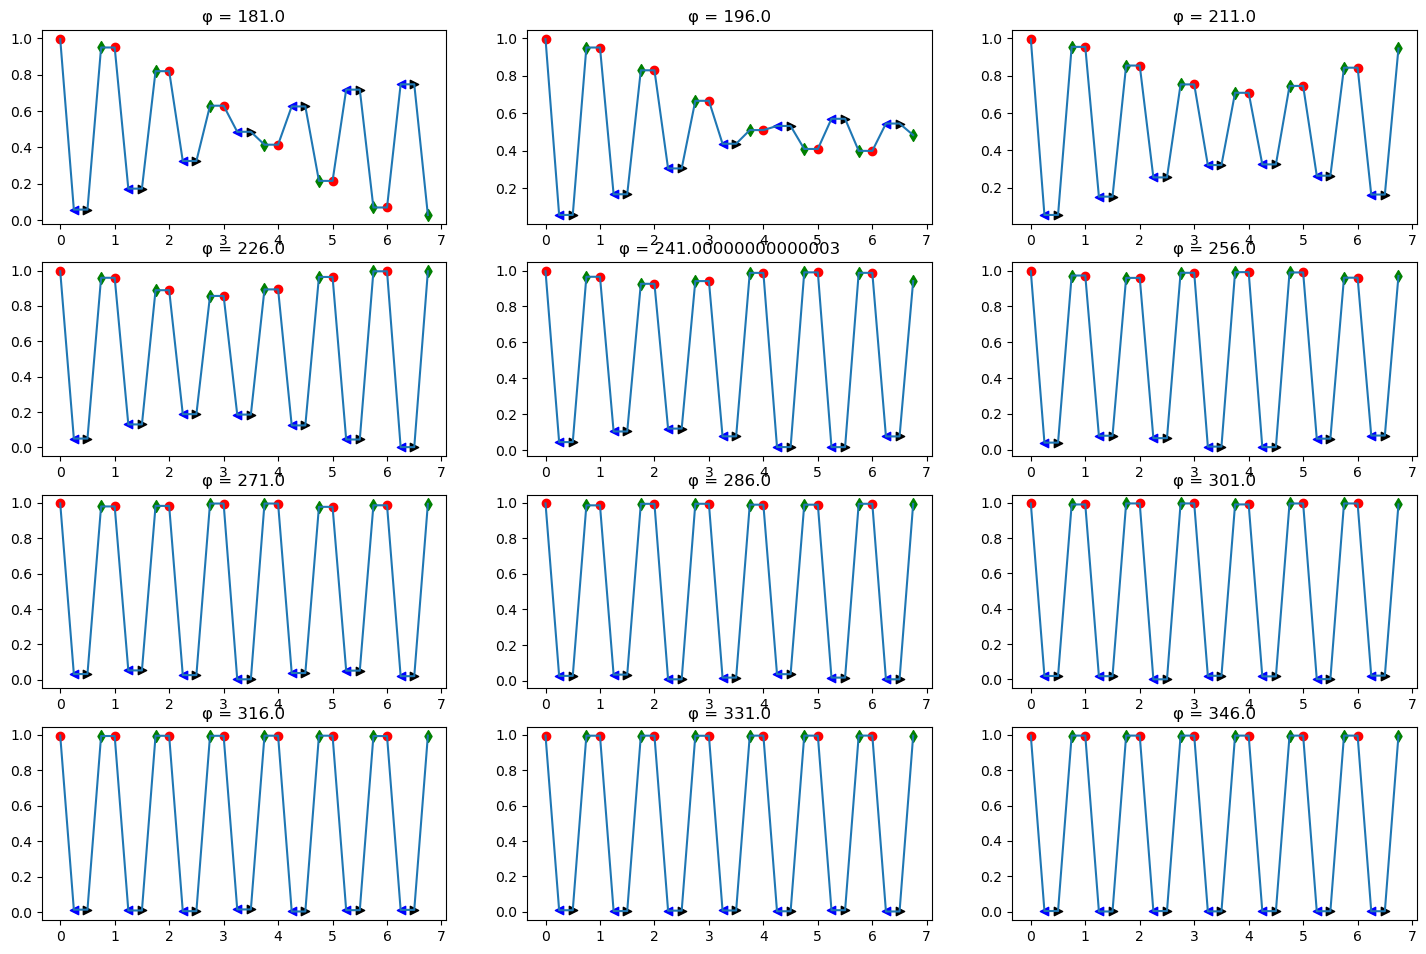

In [31]:
data_N = [a/N for a in data]
xa = [a/4 for a in x_axis]

a = len(phi)//3
b = len(phi)//a
fig, axs = pl.subplots(a,b, figsize=(10,10))
count = 0
for i in range(a):
    for j in range(b):
        axs[i,j].scatter(xa[::4], data_N[count][::4], color='red', label='O')
        axs[i,j].scatter(xa[1::4], data_N[count][1::4], color='blue', marker='<', label='H')
        axs[i,j].scatter(xa[2::4], data_N[count][2::4], color='black', marker='>', label='P')
        axs[i,j].scatter(xa[3::4], data_N[count][3::4], color='green', marker='d', label='H')
        axs[i,j].plot(xa, data_N[count])
        axs[i,j].set_title("φ = " + str(phi[count]*180/np.pi))
        count += 1
        pl.subplots_adjust(top=1, right=1.5)
pl.show()